In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from app.repository.portfolio import RepositoryPortfolio

from app.infra.config.database import get_session_local, get_db
repository_portfolio = RepositoryPortfolio(session=get_session_local())
from app.schemas.constants.enums import TransactionTypeEnum


In [3]:
from datetime import datetime
datetime.strptime("2022-12-21 00:00:00", "%Y-%m-%d %H:%M:%S")

datetime.datetime(2022, 12, 21, 0, 0)

In [4]:
import requests
import pandas as pd
API_URL = "http://localhost:8000"



list_ativos_exemplo = [
 {'date':'2022-12-21', "asset_id":55, 'asset_name': 'ITSA4.SA','quantity': 58.0,'unit_value': 7.61,'purchase_value': 441.38, 'transaction_type_id':0},
 {'date':'2023-02-09', "asset_id":101, 'asset_name': 'SAPR4.SA','quantity': 28.0,'unit_value': 3.47,'purchase_value': 97.16, 'transaction_type_id':0},
 {'date':'2023-02-09', "asset_id":18, 'asset_name': 'CPLE6.SA','quantity': 13.0,'unit_value': 7.43,'purchase_value': 96.59, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":87, 'asset_name': 'BBAS3.SA','quantity': 7.0,'unit_value': 20.81,'purchase_value': 145.67, 'transaction_type_id':0},
 {'date':'2023-02-13', "asset_id":67, 'asset_name': 'BBDC3.SA','quantity': 25.0,'unit_value': 11.99,'purchase_value': 299.75, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":73, 'asset_name': 'BBSE3.SA','quantity': 8.0,'unit_value': 35.81,'purchase_value': 286.48, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":14, 'asset_name': 'BRCO11.SA','quantity': 1.0,'unit_value': 93.15,'purchase_value': 93.15, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":100, 'asset_name': 'HGCR11.SA','quantity': 1.0,'unit_value': 100.33,'purchase_value': 100.33, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":111, 'asset_name': 'IRDM11.SA','quantity': 1.0,'unit_value': 88.94,'purchase_value': 88.94, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":114, 'asset_name': 'ITUB3.SA','quantity': 13.0,'unit_value': 22.66,'purchase_value': 294.58, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":35, 'asset_name': 'VALE3.SA','quantity': 3.0,'unit_value': 88.0,'purchase_value': 264.0, 'transaction_type_id':0},
 {'date':'2023-02-14', "asset_id":66, 'asset_name': 'WEGE3.SA','quantity': 7.0,'unit_value': 38.65,'purchase_value': 270.55, 'transaction_type_id':0},
 {'date':'2023-03-09', "asset_id":128, 'asset_name': 'BCRI11.SA','quantity': 3.0,'unit_value': 84.74,'purchase_value': 254.22, 'transaction_type_id':0},
 {'date':'2023-03-09', "asset_id":21, 'asset_name': 'PORD11.SA','quantity': 3.0,'unit_value': 8.54,'purchase_value': 25.62, 'transaction_type_id':0},
 {'date':'2023-03-09', "asset_id":103, 'asset_name': 'MXRF11.SA','quantity': 46.0,'unit_value': 10.11,'purchase_value': 465.06, 'transaction_type_id':0},
 {'date':'2023-07-10', "asset_id":103, 'asset_name': 'MXRF11.SA','quantity': 9.0,'unit_value': 10.6,'purchase_value': 95.4, 'transaction_type_id':0},
 {'date':'2023-07-04', "asset_id":113, 'asset_name': 'HABT11.SA','quantity': 10.0,'unit_value': 94.86,'purchase_value': 948.6, 'transaction_type_id':0},
 {'date':'2023-08-04', "asset_id":107, 'asset_name': 'JPPA11.SA','quantity': 10.0,'unit_value': 98.68,'purchase_value': 986.8, 'transaction_type_id':0},
 {'date':'2023-08-04', "asset_id":109, 'asset_name': 'VGIR11.SA','quantity': 100.0,'unit_value': 9.76,'purchase_value': 976.0, 'transaction_type_id':0},
 {'date':'2023-08-04', "asset_id":103, 'asset_name': 'MXRF11.SA','quantity': 100.0,'unit_value': 10.58,'purchase_value': 1058.0, 'transaction_type_id':0},
 {'date':'2023-08-04', "asset_id":120, 'asset_name': 'OUJP11.SA','quantity': 10.0,'unit_value': 100.07,'purchase_value': 1000.7, 'transaction_type_id':0},
 {'date':'2023-11-23', "asset_id":103, 'asset_name': 'MXRF11.SA','quantity': 50.0,'unit_value': 10.81,'purchase_value': 540.5, 'transaction_type_id':0},
 {'date':'2023-11-23', "asset_id":101, 'asset_name': 'SAPR4.SA','quantity': 28.0,'unit_value': 5.11,'purchase_value': 143.08, 'transaction_type_id':1},
 {'date':'2023-11-23', "asset_id":35, 'asset_name': 'VALE3.SA','quantity': 3.0,'unit_value': 75.22,'purchase_value': 225.66, 'transaction_type_id':1},
 {'date':'2023-11-23', "asset_id":66, 'asset_name': 'WEGE3.SA','quantity': 7.0,'unit_value': 33.89,'purchase_value': 237.23, 'transaction_type_id':1},
 {'date':'2023-11-27', "asset_id":96, 'asset_name': 'KNCR11.SA','quantity': 5.0,'unit_value': 101.52,'purchase_value': 507.6, 'transaction_type_id':0},
 {'date':'2023-11-28', "asset_id":107, 'asset_name': 'JPPA11.SA','quantity': 2.0,'unit_value': 91.64,'purchase_value': 183.28, 'transaction_type_id':0},
 {'date':'2023-11-28', "asset_id":113, 'asset_name': 'HABT11.SA','quantity': 3.0,'unit_value': 87.53,'purchase_value': 262.59, 'transaction_type_id':0},
]


In [22]:
df = pd.DataFrame(list_ativos_exemplo)

df.rename(columns={"date":"Data operação",
                   "":"Categoria",	
                   "asset_name":"Código Ativo",	
                   "transaction_type_id":"Operação C/V",	
                   "quantity":"Quantidade",	
                   "unit_value":"Preço unitário",	
                   "":"Corretora",	
                   "":"Corretagem",	
                   "":"Taxas",	
                   "":"Impostos",	
                   "":"IRRF",
}, inplace=True)

df["Categoria"] = 'Fundos imobiliários'
df["Corretora"] = "ADVALOR DTVM LTDA"
df["Corretagem"] = 0
df["Taxas"] = 0
df["Impostos"] = 0
df["IRRF"] = 0
df["Operação C/V"] = df["Operação C/V"].apply(lambda x: "C" if x == 0 else "V")

df['Código Ativo'] = df['Código Ativo'].apply(lambda x: x.replace(".SA", ""))
df[['Data operação', 'Categoria', 'Código Ativo', 'Operação C/V',
       'Quantidade', 'Preço unitário', 'Corretora', 'Corretagem', 'Taxas',
       'Impostos', 'IRRF']].to_excel("importacao_statusinvest.xlsx", index=False)

In [20]:
pd.read_excel("importacao_statusinvest.xlsx")



,Data operação,Categoria,Código Ativo,Operação C/V,Quantidade,Preço unitário,Corretora,Corretagem,Taxas,Impostos,IRRF
0,2022-12-21,Ações,ITSA4,C,58,7.61,ADVALOR DTVM LTDA,0,0,0,0
1,2023-02-09,Ações,SAPR4,C,28,3.47,ADVALOR DTVM LTDA,0,0,0,0
2,2023-02-09,Ações,CPLE6,C,13,7.43,ADVALOR DTVM LTDA,0,0,0,0
3,2023-02-14,Ações,BBAS3,C,7,20.81,ADVALOR DTVM LTDA,0,0,0,0
4,2023-02-13,Ações,BBDC3,C,25,11.99,ADVALOR DTVM LTDA,0,0,0,0
5,2023-02-14,Ações,BBSE3,C,8,35.81,ADVALOR DTVM LTDA,0,0,0,0
6,2023-02-14,Ações,BRCO11,C,1,93.15,ADVALOR DTVM LTDA,0,0,0,0
7,2023-02-14,Ações,HGCR11,C,1,100.33,ADVALOR DTVM LTDA,0,0,0,0
8,2023-02-14,Ações,IRDM11,C,1,88.94,ADVALOR DTVM LTDA,0,0,0,0
9,2023-02-14,Ações,ITUB3,C,13,22.66,ADVALOR DTVM LTDA,0,0,0,0


In [6]:
def get_pred_price_close(asset_id:int, date:str = datetime.strftime(datetime.now(), "%Y-%m-%d")):
    """/portfolio/get-price-class/?asset_id=1&date=2023-01-01"""
    response = requests.get(f"{API_URL}/portfolio/get-price-class/?asset_id={asset_id}&date={date}")

    response_json = response.json()
    close = response_json.get('average_close', None)
    return close

def asset_list():
    response = requests.get(f"{API_URL}/portfolio/asset/list")
    return response.json()

list_asset = asset_list()
list_asset_symbol_per_id = {asset_data['symbol']:asset_data['id'] for asset_data in list_asset}
list_asset_id_per_symbol = {asset_data['id']:asset_data['symbol'] for asset_data in list_asset}

#for i in list_ativos_exemplo:
 #   print(list_asset_symbol_per_id[i["asset_name"]])
    

In [7]:
wallet_id = 1

response = requests.get(f"{API_URL}/portfolio/history/{wallet_id}")
response_json = response.json()

df_historico_dividendos = pd.DataFrame(response_json)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
df_historico_dividendos

,date,asset_id,quantity,purchase_value,user_asset_value,transaction_type_id,unit_value,id,open,high,low,close,volume,dividends,stock_splits
0,2022-12-21,55,58,441.38,440.043615,0,7.61,217082.0,7.586959,7.632120,7.487606,7.586959,25570148.0,0.0,0.0
1,2022-12-22,55,58,441.38,442.139042,-,-,217083.0,7.586959,7.695344,7.541799,7.623087,12511494.0,0.0,0.0
2,2022-12-23,55,58,441.38,449.473145,-,-,217084.0,7.632120,7.794697,7.632120,7.749537,12430228.0,0.0,0.0
3,2022-12-26,55,58,441.38,443.710681,-,-,217085.0,7.740505,7.749537,7.595991,7.650184,7235309.0,0.0,0.0
4,2022-12-27,55,58,441.38,438.995902,-,-,217086.0,7.686312,7.713408,7.505670,7.568895,13806210.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,2025-01-07,96,5,507.60,506.500015,-,-,360918.0,102.660004,102.790001,100.709999,101.300003,191224.0,0.0,0.0
8877,2025-01-08,96,5,507.60,506.749992,-,-,360919.0,101.410004,102.029999,101.309998,101.349998,87519.0,0.0,0.0
8878,2025-01-09,96,5,507.60,504.500008,-,-,360920.0,101.349998,101.750000,100.779999,100.900002,88038.0,0.0,0.0
8879,2025-01-10,96,5,507.60,512.999992,-,-,360921.0,101.059998,103.370003,101.050003,102.599998,168323.0,0.0,0.0


In [8]:
from typing import List
import pandas as pd

def analyze_portfolio_transactions(transactions: List[dict]):
    """
    Analisa as transações de ativos do portfólio para calcular métricas como rentabilidade.

    :param transactions: Lista de transações de ativos.
    :return: Dicionário contendo as métricas do portfólio.
    """

    # Converte as transações em DataFrame
    df_transactions = pd.DataFrame(transactions)

    # Atualiza valores atuais com base no preço atual (simula a chamada de uma função externa, get_pred_price_close)
    df_transactions["unit_value_today"] = df_transactions["asset_id"].apply(lambda x: get_pred_price_close(x))
    df_transactions["purchase_value_today"] = df_transactions["unit_value_today"] * df_transactions["quantity"]

    # Calcula valores agregados
    total_invested = df_transactions[df_transactions["transaction_type_id"] == 0]["purchase_value"].sum()
    total_portfolio_value = df_transactions["purchase_value_today"].sum()
    profitability = round(((total_portfolio_value * 100) / total_invested) - 100, 2)

    # Rentabilidade por ativo
    profitability_per_asset = df_transactions.groupby("asset_id").apply(
        lambda group: round(
            ((group["purchase_value_today"].sum() * 100) / group["purchase_value"].sum()) - 100, 2
        )
    ).to_dict()

    # Distribuição do portfólio por ativo
    portfolio_distribution = df_transactions.groupby("asset_id")["purchase_value_today"].sum().to_dict()

    return {
        "total_invested": total_invested,
        "total_portfolio_value": total_portfolio_value,
        "profitability": profitability,
        "profitability_per_asset": profitability_per_asset,
        "portfolio_distribution": portfolio_distribution,
    }

df = df_historico_dividendos[(df_historico_dividendos['transaction_type_id']==0)].copy()
data = analyze_portfolio_transactions(transactions=df)


/tmp/ipykernel_2276039/1224681119.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profitability_per_asset = df_transactions.groupby("asset_id").apply(


In [9]:
data['profitability_per_asset']

{14: 2.09,
 18: 18.84,
 21: -14.87,
 35: -41.47,
 55: 14.59,
 66: 37.77,
 67: -13.84,
 73: 1.03,
 87: 16.34,
 96: 0.54,
 100: -6.58,
 101: 44.96,
 103: -11.7,
 107: -21.35,
 109: -4.1,
 111: -29.4,
 113: -22.7,
 114: 20.43,
 120: -29.05,
 128: -29.51}

In [10]:
def login(email, password):
    data = {"username": email, "password": password}
    response = requests.post(f"{API_URL}/auth/token", data=data)
    return response.json()

def signup(name, email, password):
    response = requests.post(f"{API_URL}/auth/signup", json={
        "name": name,
        "email": email, 
        "password": password})
    return response.json()

def create_portfolio(access_token):
    json = {
        "name": "Minha Carteira",
    }
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.post(f"{API_URL}/portfolio/create", json=json, headers=headers)
    return response.json()

def list_portfolios(access_token):
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(f"{API_URL}/portfolio/list", headers=headers)
    return response.json()


user_exemple = {"name": "GuiBrand", "email": "guilherme@gmail.com", "password": "#Gui12345678"}
registred = signup(**user_exemple)
user = login(email=user_exemple["email"], password=user_exemple["password"])
access_token = user['access_token']

created_poetfolio = create_portfolio(access_token=access_token)
my_portfolios = list_portfolios(access_token=access_token)

my_portfolios


[{'id': 1,
  'user_id': 1,
  'created_at': '2025-01-21T21:25:07',
  'name': 'string',
  'description': None,
  'updated_at': '2025-01-21T21:25:07'},
 {'id': 2,
  'user_id': 1,
  'created_at': '2025-01-21T21:25:43',
  'name': 'Minha Carteira',
  'description': None,
  'updated_at': '2025-01-21T21:25:43'}]

In [9]:
def create_portfolio(access_token):
    json = {
        "name": "string",
    }
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.post(f"{API_URL}/portfolio/create", json=json, headers=headers)
    return response.json()

dados = create_portfolio(access_token)
dados

{'detail': 'Você já possui uma carteira com este nome!'}

In [11]:
from datetime import datetime

def add_transaction(access_token, data):
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.post(f"{API_URL}/portfolio/transaction/add", json=data, headers=headers)
    return response.json()

def run():
    response = requests.get(f"{API_URL}/portfolio/asset/list")
    list_asset = response.json()
    dict_asset = {asset['symbol']:asset['id'] for asset in list_asset}
    enum_transaction_type = {"Compra": 0, "Venda": 1}

    for data_ativo in list_ativos_exemplo:
        data_ativo['portfolio_id'] = 2#my_portfolios[0]['id']
        add_transaction(data=data_ativo, access_token=access_token)
# run()
    

In [13]:
def get_transaction(portfolio_id):
    response = requests.get(f"{API_URL}/portfolio/transaction/{portfolio_id}")

    if not response.status_code == 200:
        return {}
    
    return response.json()

def get_history(portfolio_id):
    response = requests.get(f"{API_URL}/portfolio/history/{portfolio_id}")

    if not response.status_code == 200:
        return {}
    
    return response.json()




In [14]:
from concurrent.futures import ThreadPoolExecutor

def generate_asset_analysis_report(asset_id):
    response = requests.get(f"{API_URL}/portfolio/generate-asset-analysis-report/{asset_id}")
    if not response.status_code == 200:
        return {}
    
    return response.json()


# Define a função para ser executada em paralelo
def generate_report(asset_id):
    
    if not isinstance(asset_id, int):
        print(asset_id)
        return None
    
    return generate_asset_analysis_report(asset_id)

#df_response_transaction = get_transaction(1)

# Usa ThreadPoolExecutor para paralelismo
with ThreadPoolExecutor() as executor:
    asset_reports = list(executor.map(generate_report, [55]))


pd.DataFrame(asset_reports)

,asset_id,DY_annual_%,yield_on_cost_anual_%,received_by_annual_quota,monthly_percentage_variation,monthly_accumulated_variation_%,is_recurring_dividends,recurring_dividends_%,months_paid_freq,last_payment_quota,updated_unit_value
0,55,7.454128,6.69,0.65,"[8.92, 0.18, -3.49, -8.66, -5.06]",-8.11,False,75.0,9/12,0.06,8.72


In [59]:

# Busca histórico de dividendos
response = requests.get(f"{API_URL}/portfolio/history/{wallet_id}")
if response.status_code == 200:
    response_json = response.json()
    df_historico_dividendos = pd.DataFrame(response_json)
else:
    print("Error")
df_historico_dividendos

,date,asset_id,quantity,purchase_value,user_asset_value,transaction_type_id,unit_value,id,open,high,low,close,volume,dividends,stock_splits
0,2022-12-21,55,58,441.38,440.043615,0,7.61,217082.0,7.586959,7.632120,7.487606,7.586959,25570148.0,0.0,0.0
1,2022-12-22,55,58,441.38,442.139042,-,-,217083.0,7.586959,7.695344,7.541799,7.623087,12511494.0,0.0,0.0
2,2022-12-23,55,58,441.38,449.473145,-,-,217084.0,7.632120,7.794697,7.632120,7.749537,12430228.0,0.0,0.0
3,2022-12-26,55,58,441.38,443.710681,-,-,217085.0,7.740505,7.749537,7.595991,7.650184,7235309.0,0.0,0.0
4,2022-12-27,55,58,441.38,438.995902,-,-,217086.0,7.686312,7.713408,7.505670,7.568895,13806210.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,2025-01-07,96,5,507.60,506.500015,-,-,360918.0,102.660004,102.790001,100.709999,101.300003,191224.0,0.0,0.0
8877,2025-01-08,96,5,507.60,506.749992,-,-,360919.0,101.410004,102.029999,101.309998,101.349998,87519.0,0.0,0.0
8878,2025-01-09,96,5,507.60,504.500008,-,-,360920.0,101.349998,101.750000,100.779999,100.900002,88038.0,0.0,0.0
8879,2025-01-10,96,5,507.60,512.999992,-,-,360921.0,101.059998,103.370003,101.050003,102.599998,168323.0,0.0,0.0


In [37]:
df_historico_dividendos

,date,asset_id,quantity,purchase_value,user_asset_value,transaction_type_id,unit_value,id,open,high,low,close,volume,dividends,stock_splits
0,2022-12-21,55,58,441.38,440.043615,0,7.61,217082.0,7.586959,7.632120,7.487606,7.586959,25570148.0,0.0,0.0
1,2022-12-22,55,58,441.38,442.139042,-,-,217083.0,7.586959,7.695344,7.541799,7.623087,12511494.0,0.0,0.0
2,2022-12-23,55,58,441.38,449.473145,-,-,217084.0,7.632120,7.794697,7.632120,7.749537,12430228.0,0.0,0.0
3,2022-12-26,55,58,441.38,443.710681,-,-,217085.0,7.740505,7.749537,7.595991,7.650184,7235309.0,0.0,0.0
4,2022-12-27,55,58,441.38,438.995902,-,-,217086.0,7.686312,7.713408,7.505670,7.568895,13806210.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,2025-01-07,96,5,507.60,506.500015,-,-,360918.0,102.660004,102.790001,100.709999,101.300003,191224.0,0.0,0.0
8877,2025-01-08,96,5,507.60,506.749992,-,-,360919.0,101.410004,102.029999,101.309998,101.349998,87519.0,0.0,0.0
8878,2025-01-09,96,5,507.60,504.500008,-,-,360920.0,101.349998,101.750000,100.779999,100.900002,88038.0,0.0,0.0
8879,2025-01-10,96,5,507.60,512.999992,-,-,360921.0,101.059998,103.370003,101.050003,102.599998,168323.0,0.0,0.0


In [ ]:
set_asset_id = {128, 14, 18, 21, 35, 55, 66, 67, 73, 87, 96, 100, 101, 103, 107, 109, 111, 113, 114, 120}

resultado = repository_portfolio.history(set_asset_id)

In [32]:
from datetime import datetime 



# 

#date_one_year_ago = date_one_year_ago.strftime('%Y-%m-%d')
#df['year-month'] = df['date'].dt.to_period('M')
#date_one_year_ago

df_historico_dividendos.sort_values(by="date", inplace=True)

# Filtrar os dividendos do mês atual
df_dividendos_mes = df_historico_dividendos[
    (df_historico_dividendos["date"].dt.month == datetime.now().month) &    # Mês atual
    (df_historico_dividendos["date"].dt.year == datetime.now().year)       # Ano atual
].copy()


assets_dividends_received_per_date = df_dividendos_mes[df_dividendos_mes['dividends_received_total']>0]


columns = ["date", 'asset_name', "quantity", "dividends", "dividends_received_total"]
assets_dividends_received_per_date[columns]

,date,asset_name,quantity,dividends,dividends_received_total
8591,2025-01-02,OUJP11.SA,10,1.240000,12.400000
4797,2025-01-02,ITUB3.SA,13,0.017650,0.229450
3845,2025-01-02,HGCR11.SA,1,0.950000,0.950000
2417,2025-01-02,BBDC3.SA,25,0.267251,6.681275
3369,2025-01-02,BRCO11.SA,1,0.870000,0.870000
6210,2025-01-02,BCRI11.SA,3,0.780000,2.340000
8873,2025-01-02,KNCR11.SA,5,1.000000,5.000000
6671,2025-01-02,PORD11.SA,3,0.089000,0.267000
7132,2025-01-02,MXRF11.SA,205,0.100000,20.500000
7873,2025-01-02,JPPA11.SA,12,1.360000,16.320000


In [17]:
# Recebidos totrais

assets_dividends_received = df_dividendos_mes.groupby("asset_name")["dividends_received_total"].sum()
assets_dividends_received = assets_dividends_received.reset_index()
assets_dividends_received[assets_dividends_received["dividends_received_total"]>0]

,asset_name,dividends_received_total
1,BBDC3.SA,7.112525
3,BCRI11.SA,2.340000
4,BRCO11.SA,0.870000
6,HABT11.SA,13.650000
7,HGCR11.SA,0.950000
8,IRDM11.SA,0.930000
10,ITUB3.SA,0.229450
11,JPPA11.SA,16.320000
12,KNCR11.SA,5.000000
13,MXRF11.SA,20.500000


Dividendos

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from datetime import datetime


## DIVIDENDOS
def create_periods_barras(qtd_periods_barras=24):
    data_hoje = datetime.now().strftime('%b-%Y')
    data_inicial = pd.to_datetime(data_hoje, format='%b-%Y')
    intervalo_datas = pd.date_range(end=data_inicial, periods=qtd_periods_barras, freq='ME')
    datas_formatadas = list(intervalo_datas.strftime('%b-%Y'))
    datas_formatadas.append(data_hoje)
    return pd.DataFrame([{'asset_name': '_',
                'mes': 0,
                'ano': 0,
                'dividends': 0,
                'mes-map': '-',
                'mes-ano':mes_ano} for mes_ano in datas_formatadas])

def plot_recebimentos_ativo_mes(df_historico_dividendos, target_receive_dividends=None, is_web=False):
    """
    Recebe: Dataframe de histórico de dividendos

    Retorna: plot com gráfico de barras dos dividendos recebidos no período
    """
    
    if isinstance(df_historico_dividendos, pd.DataFrame):

        df = df_historico_dividendos.copy()

        # Converter a coluna 'date_pagamento' para o tipo 'datetime'

        df['date'] = pd.to_datetime(df['date'])

        # Extrair o mês e o ano da coluna 'date' em duas novas colunas
        df['mes'] = df['date'].dt.month
        df['ano'] = df['date'].dt.year

        # Agregar os valores recebidos por ativo, mês e ano
        df_agregado = df.groupby(['asset_name', 'mes', 'ano'])['dividends_received_total'].sum().reset_index()

        # Mapear números de mês para os rótulos desejados
        mes_labels = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}

        # Substituir os números de mês pelos rótulos
        df_agregado['mes-map'] = df_agregado['mes'].map(mes_labels)

        # df_agregado['mes-ano'] = df_agregado['mes-map'].astype(str) + "-" + df_agregado['ano'].astype(str)
        df_agregado['mes-ano'] = pd.to_datetime(df_agregado['ano'].astype(str) + df_agregado['mes'].astype(str), format='%Y%m')
        df_agregado['mes-ano'] = df_agregado['mes-ano'].dt.strftime('%b-%Y')

        df_agregado = pd.concat([df_agregado, create_periods_barras(qtd_periods_barras=17)], ignore_index=True)

    else:
        df_agregado = create_periods_barras(qtd_periods_barras=17)

    # Ordenar o DataFrame pela coluna 'mes' e 'ano'
    df_agregado.sort_values(by=["ano", "mes"], ascending=True, inplace=True)
    df_agregado = df_agregado[df_agregado['asset_name']!="_"]
    #df_agregado.reset_index(drop=True, inplace=True)
    # df_agregado.reset_index(drop=True, inplace=True)

    # Criar o gráfico de barras no Plotly
    
    fig = px.bar(df_agregado, x='mes-ano', y='dividends_received_total', color='asset_name',
                labels={'dividends_received_total': 'Valor Recebido R$', 'mes-ano': 'Mês'},
                title='Dividendos recebido por mês',
                category_orders={"mes-ano": df_agregado['mes-ano']}
                )
    espaco_entre_barras = 0.1
    fig.update_layout(
        bargap=espaco_entre_barras,
        yaxis_tickformat=".2f"  # Define o formato com duas casas decimais
        )

    # Adicionar linha horizontal para representar a meta
    if target_receive_dividends is not None:
        fig.add_shape(
            go.layout.Shape(
                type="line",
                x0=df_agregado['mes-ano'].iloc[0],
                x1=df_agregado['mes-ano'].iloc[-1],
                y0=target_receive_dividends,
                y1=target_receive_dividends,
                line=dict(color="red", width=2),
            )
        )
    
    
    # Adicionar rótulos de texto no topo de cada barra
    for i, row in df_agregado.groupby(['mes-ano'])['dividends_received_total'].sum().reset_index().iterrows():
        if row['dividends_received_total'] != 0:
            fig.add_annotation(
                go.layout.Annotation(
                    x=row['mes-ano'],
                    y=row['dividends_received_total'],
                    text='',  # f"R${row['recebidos']:.2f}",  # Exibe o valor com duas casas decimais
                    showarrow=False,
                    arrowhead=0,
                    ax=0,
                    ay=-30,
                    # yshift=10,
                    font=dict(size=14)
                    )
            )

    max = df_agregado.groupby(['mes-ano'])['dividends_received_total'].sum().max()
    
    fig.update_yaxes(range=[0, max])
    # fig.update_xaxes(tickangle=45)
    if is_web:
        return fig.to_html()
    
    return fig

list_asset = asset_list()
list_asset_symbol_per_id = {asset_data['symbol']:asset_data['id'] for asset_data in list_asset}
list_asset_id_per_symbol = {asset_data['id']:asset_data['symbol'] for asset_data in list_asset}
df_historico_dividendos["asset_name"] = df_historico_dividendos["asset_id"].apply(lambda x: list_asset_id_per_symbol.get(x, "Desconhecido"))
df_historico_dividendos["dividends_received_total"] = df_historico_dividendos["quantity"] * df_historico_dividendos["dividends"]

fig = plot_recebimentos_ativo_mes(df_historico_dividendos)

fig

In [ ]:
# Funções
from datetime import datetime, timedelta

current_date = datetime.now()
date_one_year_ago = current_date - timedelta(days=365)
date_one_year_ago = date_one_year_ago.strftime('%Y-%m-%d')

date_one_year_ago

'2024-01-19'

In [20]:
df_transaction_history = df_historico_dividendos.copy()

df_historico_dividendos[df_historico_dividendos["asset_name"]=='KNCR11.SA']


list_ativos = df_transaction_history["asset_name"].unique()

Estatísticas Gerais

In [21]:
response = requests.get(f"{API_URL}/portfolio/history/{1}")
if response.status_code == 200:
    response_json = response.json()


df_history = pd.DataFrame(response_json)

In [ ]:
def format_dataframe(df:pd.DataFrame):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format='ISO8601')
    df['year-month'] = df['date'].dt.to_period('M')
    df.set_index('date', inplace=True)
    return df



## DIVIDENDOS
def create_periods_barras(qtd_periods_barras=24):
    data_hoje = datetime.now().strftime('%Y-%b')
    data_inicial = pd.to_datetime(data_hoje, format='%Y-%b')
    intervalo_datas = pd.date_range(end=data_inicial, periods=qtd_periods_barras, freq='ME')
    datas_formatadas = list(intervalo_datas.strftime('%Y-%b'))
    datas_formatadas.append(data_hoje)
    return pd.DataFrame([{'asset_name': '_',
                'dividends': 0,
                'year-month-map': '-',
                'mes-ano':mes_ano} for mes_ano in datas_formatadas])

df = df_history.copy()


df = format_dataframe(df)
df["dividends_received_total"] = df["quantity"] * df["dividends"]

df['asset_name'] = df['asset_id'].apply(lambda x: list_asset_id_per_symbol[x])

df['purchase_value_real'] = df['quantity'] * df['close']

# Agregar os valores recebidos por ativo, mês e ano
df_agregado = df.groupby(['asset_name', 'year-month'])['dividends_received_total'].sum().reset_index()


# Mapear números de mês para os rótulos desejados
mes_labels = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}

# Substituir os números de mês pelos rótulos
df_agregado['year-month-map'] = df_agregado['year-month'].map(mes_labels)
# df_agregado['mes-ano'] = df_agregado['mes-map'].astype(str) + "-" + df_agregado['ano'].astype(str)

#df_agregado = pd.concat([df_agregado, create_periods_barras(qtd_periods_barras=17)], ignore_index=True)

df_agregado#.tail()

,asset_name,year-month,dividends_received_total,year-month-map
0,BBAS3.SA,2023-02,2.894087,NaN
1,BBAS3.SA,2023-03,1.232126,NaN
2,BBAS3.SA,2023-04,0.000000,NaN
3,BBAS3.SA,2023-05,0.000000,NaN
4,BBAS3.SA,2023-06,1.615740,NaN
...,...,...,...,...
442,WEGE3.SA,2024-09,0.000000,NaN
443,WEGE3.SA,2024-10,0.000000,NaN
444,WEGE3.SA,2024-11,0.000000,NaN
445,WEGE3.SA,2024-12,0.000000,NaN


In [ ]:
create_periods_barras(qtd_periods_barras=17)

,asset_name,dividends,year-month-map,mes-ano
0,_,0,-,2023-Aug
1,_,0,-,2023-Sep
2,_,0,-,2023-Oct
3,_,0,-,2023-Nov
4,_,0,-,2023-Dec
5,_,0,-,2024-Jan
6,_,0,-,2024-Feb
7,_,0,-,2024-Mar
8,_,0,-,2024-Apr
9,_,0,-,2024-May


In [ ]:
import yfinance as yf


# Baixando dados de janeiro a julho de 2023
data = yf.download("IFIX.SA", start="2023-01-01", end="2023-07-01", interval="1d")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IFIX.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2023-07-01)')


In [ ]:
import yfinance as yf

asset = "XFIX11.SA"  # ETF que replica o IFIX
asset = "IMOB.SA"  # ETF que replica o IFIX

stock = yf.Ticker(asset)

# Nome do ativo
name = stock.info.get('shortName', asset)
print("Nome:", name)

# Histórico de preços
data = stock.history(period="1d")
data


Nome: IMOBILIARIO


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-17 00:00:00-03:00,765.109985,770.039978,756.97998,766.090027,0,0.0,0.0


In [26]:
yf.download("BTC-USD", period="max")
# DOGE-USD
# ADA-USD
# XRP-USD
# LCT-USD
# SOL-USD
# BNB-USD
# USDT-USD
# MATIC-USD


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-01-14,96534.046875,97352.664062,94322.156250,94519.007812,53769675818
2025-01-15,100504.492188,100697.234375,96501.640625,96534.046875,57805923627


In [27]:
END 

NameError: name 'END' is not defined

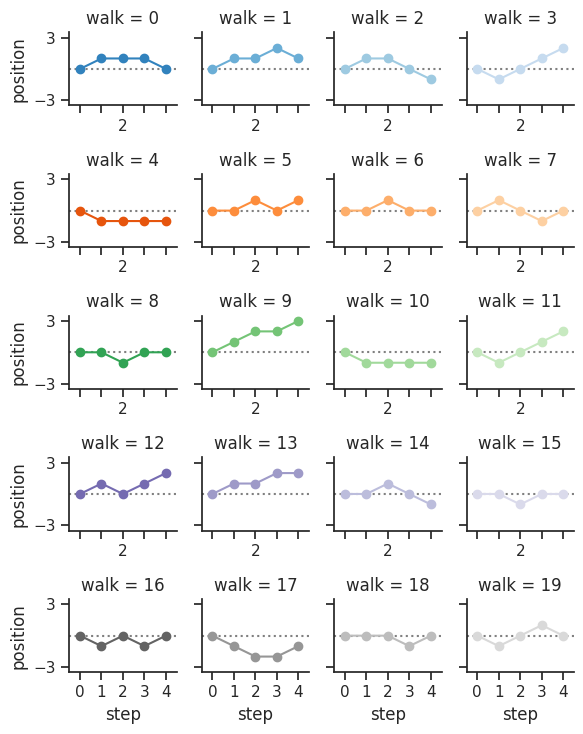

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.tight_layout(w_pad=1)

In [220]:
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19


----

Informações sobre uma carteira especifica

NameError: name 'eda' is not defined

In [533]:
my_portfolios[0]['id']

5

In [534]:
response = requests.get(f"{API_URL}/portfolio/history/{my_portfolios[0]['id']}")
portfolio_history = response.json()

#response = requests.get(f"{API_URL}/portfolio/transaction/history/{my_portfolios[0]['id']}")
#transaction_history = response.json():

In [535]:
portfolio_history

[{'date': '2022-12-21T00:00:00',
  'asset_id': 6,
  'quantity': 58,
  'purchase_value': 440.0436153411865,
  'user_asset_value': 440.0436153411865,
  'transaction_type_id': 0,
  'unit_value': 7.586958885192871,
  'id': 20414.0,
  'open': 7.586958885192871,
  'high': 7.632120132446289,
  'low': 7.487606048583984,
  'close': 7.586958885192871,
  'volume': 25570148.0,
  'dividends': 0.0,
  'stock_splits': 0.0},
 {'date': '2022-12-22T00:00:00',
  'asset_id': 6,
  'quantity': 58,
  'purchase_value': 440.0436153411865,
  'user_asset_value': 442.13904190063477,
  'transaction_type_id': '-',
  'unit_value': '-',
  'id': 20415.0,
  'open': 7.586958885192871,
  'high': 7.695343971252441,
  'low': 7.541799068450928,
  'close': 7.623086929321289,
  'volume': 12511494.0,
  'dividends': 0.0,
  'stock_splits': 0.0},
 {'date': '2022-12-23T00:00:00',
  'asset_id': 6,
  'quantity': 58,
  'purchase_value': 440.0436153411865,
  'user_asset_value': 449.4731454849243,
  'transaction_type_id': '-',
  'unit_v

In [269]:
# Separar os dados por mês



df_portfolio_history = pd.DataFrame(portfolio_history)

df_portfolio_history = format_dataframe(df_portfolio_history)



In [281]:
"""Agrupe a valorização de cada ativo ao longo do tempo de mês em mês, sem considerar o valor de compra e venda ativos adquiridos."""

#df_portfolio_history['date'] = df_portfolio_history['date'].dt.strftime('%Y-%m-%d')

asset_id = 9# df_portfolio_history['asset_id'].sample(1).values[0]
asset_history = df_portfolio_history[df_portfolio_history['asset_id']==int(asset_id)]

asset_history[asset_history['year-month'] == "2023-02"]#.groupby('year-month')['purchase_value'].sum().plot(kind='bar')



,asset_id,quantity,purchase_value,user_asset_value,transaction_type_id,unit_value,id,open,high,low,close,volume,dividends,stock_splits,year-month
date,,,,,,,,,,,,,,,
2023-02-14,9,3,261.299995,261.299995,0,87.099998,29407.0,87.000000,87.720001,86.529999,87.099998,20072400.0,0.0,0.0,2023-02
2023-02-15,9,3,261.299995,267.000000,-,-,29408.0,87.099998,89.239998,86.559998,89.000000,28465800.0,0.0,0.0,2023-02
2023-02-16,9,3,261.299995,267.570007,-,-,29409.0,89.290001,90.260002,88.900002,89.190002,28740800.0,0.0,0.0,2023-02
2023-02-17,9,3,261.299995,264.089996,-,-,29410.0,89.599998,89.750000,87.540001,88.029999,26381400.0,0.0,0.0,2023-02
2023-02-22,9,3,261.299995,262.080002,-,-,29411.0,87.050003,88.449997,86.570000,87.360001,16864400.0,0.0,0.0,2023-02
2023-02-23,9,3,261.299995,260.849991,-,-,29412.0,87.000000,88.070000,85.550003,86.949997,21485100.0,0.0,0.0,2023-02
2023-02-24,9,3,261.299995,255.120003,-,-,29413.0,86.050003,86.480003,84.650002,85.040001,17183900.0,0.0,0.0,2023-02
2023-02-27,9,3,261.299995,255.120003,-,-,29414.0,84.559998,85.379997,83.650002,85.040001,14422200.0,0.0,0.0,2023-02
2023-02-28,9,3,261.299995,255.959999,-,-,29415.0,85.059998,86.500000,84.339996,85.320000,21127300.0,0.0,0.0,2023-02


In [323]:
# Quero que tenha barra que represente o patrimonio 
# + barra que represente o valor da compra no mês
# + barra que represente o valor da venda no mês
# + linha que represente o valor do rendimento positivo do ativo no mês
# + linha que represente o valor do rendimento passivo do ativo no mês
# + linha que represente o valor de dividendos recebido no mês


In [531]:
# Agrupando e somando valores de compra por mês e ativo
monthly_asset_buy = (
    df_portfolio_history[df_portfolio_history['transaction_type_id'] == TransactionTypeEnum.COMPRA_ID.value]
    .groupby(['year-month', 'asset_id'])['purchase_value']
    .sum()
    .reset_index()
    .rename(columns={'purchase_value': 'total_purchase_value'})
)

# Agrupando e somando valores de venda por mês e ativo
monthly_asset_sell = (
    df_portfolio_history[df_portfolio_history['transaction_type_id'] == TransactionTypeEnum.VENDA_ID.value]
    .groupby(['year-month', 'asset_id'])['purchase_value']
    .sum()
    .reset_index()
    .rename(columns={'purchase_value': 'total_sell_value'})
)

# Somando os dividendos mensais por ativo
monthly_dividends = (
    df_portfolio_history.groupby(['year-month', 'asset_id'])['dividends']
    .sum()
    .reset_index()
    .rename(columns={'dividends': 'total_dividends'})
)

# Calculando a diferença entre o primeiro e último fechamento (retorno mensal)
monthly_close_diff = (
    df_portfolio_history.groupby(['year-month', 'asset_id'])
    .agg(
        first_close=('close', 'first'),
        last_close=('close', 'last'),
        quantity=('quantity', 'last')  # Adicionando quantidade para cálculo de valor do ativo
    )
    .reset_index()
)

# Calculando o retorno mensal (variação de preço)
monthly_close_diff['monthly_return'] = (
    monthly_close_diff['last_close'] - monthly_close_diff['first_close']
)

# Combinando todas as informações em um único DataFrame
monthly_data = (
    monthly_close_diff
    .merge(monthly_asset_buy, on=['year-month', 'asset_id'], how='left')
    .merge(monthly_asset_sell, on=['year-month', 'asset_id'], how='left')
    .merge(monthly_dividends, on=['year-month', 'asset_id'], how='left')
)

# Preenchendo valores NaN com 0 (caso algum ativo não tenha valores em uma das colunas)
monthly_data.fillna(0, inplace=True)

# Calculando o valor total do ativo do usuário no final de cada mês
monthly_data['user_asset_value'] = monthly_data['last_close'] * monthly_data['quantity']

# Renomeando colunas para facilitar a leitura
monthly_data.rename(
    columns={
        'first_close': 'start_close',
        'last_close': 'end_close',
        'quantity': 'end_quantity'
    },
    inplace=True
)

# Resultado final
monthly_data


,year-month,asset_id,start_close,end_close,end_quantity,monthly_return,total_purchase_value,total_sell_value,total_dividends,user_asset_value
0,2022-12,6,7.586959,7.686312,58,0.099353,440.043615,0.0,0.000000,445.806108
1,2023-01,6,7.550831,7.704376,58,0.153545,0.000000,0.0,0.000000,446.853821
2,2023-02,2,3.450000,3.410000,28,-0.040000,96.600001,0.0,0.000000,95.480002
3,2023-02,5,38.360001,39.160000,7,0.799999,268.520004,0.0,0.226304,274.119999
4,2023-02,6,7.478574,7.433413,58,-0.045161,0.000000,0.0,0.000000,431.137956
...,...,...,...,...,...,...,...,...,...,...
442,2025-01,37,101.750000,102.599998,5,0.849998,0.000000,0.0,1.000000,512.999992
443,2025-01,41,9.320000,9.420000,100,0.100000,0.000000,0.0,0.000000,942.000008
444,2025-01,42,10.480000,10.310000,25,-0.169999,0.000000,0.0,0.284501,257.750010
445,2025-01,50,76.510002,78.750000,42,2.239998,0.000000,0.0,1.360000,3307.500000


In [364]:
monthly_data.head(1)

,year-month,asset_id,start_close,end_close,end_quantity,monthly_return,total_purchase_value,total_sell_value,total_dividends,user_asset_value
0,2022-12,6,7.586959,7.686312,58,0.099353,440.043615,0.0,0.0,445.806108


----

Validando dados

In [532]:
import plotly.graph_objects as go

monthly_data['date'] = monthly_data['year-month'].dt.to_timestamp().dt.strftime('%Y-%m-%d')
monthly_data["total_sell_value"] = monthly_data["total_sell_value"]*-1

df = monthly_data.copy()#[monthly_data['asset_id']==monthly_data['asset_id'].tolist()[5]]

# df.loc[df.index, "user_asset_value"] = df["user_asset_value"] - df['total_purchase_value']
df.loc[df.index, "total_dividends"] = df["end_quantity"] * df['total_dividends']
df.loc[df.index, "monthly_return"] = df["end_quantity"] * df['monthly_return']
df.loc[df.index, "total_dividends"] = df['total_dividends'].apply(lambda x: round(x, 2))

# Dados fictícios para o eixo x e y (garanta que os tamanhos sejam iguais)
x = df["date"].tolist()#[:5]  # Datas no formato ISO

total_purchase_value = df["total_purchase_value"].tolist()#[:5]
user_asset_value = df["user_asset_value"].tolist()#[:5]
total_sell_value = df["total_sell_value"].tolist()#[:5]
total_dividends = df["total_dividends"].tolist()#[:5]
monthly_return = df["monthly_return"].tolist()#[:5]

# Criando a figura
fig = go.Figure()

# Adicionando as barras para cada conjunto de dados
# fig.add_trace(go.Bar(x=x, y=total_purchase_value, name='total_purchase_value'))
fig.add_trace(go.Bar(x=x, y=total_sell_value, name='total_sell_value'))
# fig.add_trace(go.Bar(x=x, y=user_asset_value, name='user_asset_value
fig.add_trace(go.Bar(x=x, y=total_dividends, name='total_dividends'))
fig.add_trace(go.Bar(x=x, y=monthly_return, name='monthly_return'))

# Configurando o layout
fig.update_layout(
    barmode='relative',  # As barras serão exibidas empilhadas
    title_text='Evolução do Patrimônio',  # Título do gráfico
    xaxis_title='Ano-Mês',  # Rótulo do eixo X
    yaxis_title='Valor',  # Rótulo do eixo Y
    legend_title='Séries',  # Título da legenda
    template='plotly_white',  # Tema mais claro para o gráfico
    xaxis=dict(
        tickformat='%b %Y',  # Formata como "Jan 2023", "Feb 2023", etc.
        tickmode='array',  # Define que os ticks seguem o array de dados
        tickvals=x,  # Garante que os rótulos correspondam ao eixo x fornecido
    )
)

fig.show()


In [515]:
df['total_dividends']

0           0.00
1           0.00
2           0.00
3          77.62
4           0.00
         ...    
442       125.00
443         0.00
444      4445.33
445    100759.68
446        38.78
Name: total_dividends, Length: 447, dtype: float64

In [99]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from app.repository.portfolio import RepositoryPortfolio
#from app.infra.config.database import get_session_local, get_db
#portfolio_repository = RepositoryPortfolio(session=get_session_local())
from typing import List, Dict

def create_plot(portfolio_history:List[Dict], asset_id:int):

    # Criando um índice para o DataFrame
    df_portfolio_history = pd.DataFrame(portfolio_history)
    df_portfolio_history['date'] = pd.to_datetime(df_portfolio_history['date'])

    response = requests.get(f"{API_URL}/portfolio/asset/list/")
    asset_name_per_id = {asset_data["id"]:asset_data["symbol"] for asset_data in response.json()}

    df_portfolio_history.set_index('date', inplace=True)
    # Filtrando os dados para o ativo específico
    asset_data = df_portfolio_history[df_portfolio_history['asset_id'] == asset_id]
    
    # Buscando o nome do ativo correspondente
    asset_name = asset_name_per_id.get(asset_id, 'None')
    
    # Criando o gráfico com Plotly
    fig = go.Figure()
    
    # Adicionando a série de valores do usuário
    fig.add_trace(go.Scatter(
        x=asset_data.index,
        y=asset_data['user_asset_value'],
        mode='lines',
        name='User Asset Value',
        line=dict(width=2, color='blue')
    ))
    
    # Adicionando a série de valores de compra
    fig.add_trace(go.Scatter(
        x=asset_data.index,
        y=asset_data['purchase_value'],
        mode='lines',
        name='Purchase Value',
        line=dict(width=2, color='green')
    ))
    
    # Configurando o layout do gráfico
    fig.update_layout(
        title=f"Evolução do Ativo: {asset_name}",
        xaxis_title="Data",
        yaxis_title="Valor",
        legend_title="Legenda",
        template="plotly_white",
        height=600,
        width=1000,
    )
    
    return fig

set_asset_id = {i["asset_id"] for i in portfolio_history}
list_asset_id = list(set_asset_id)

create_plot(portfolio_history, asset_id=list_asset_id[3])

In [100]:
import plotly.express as px
import pandas as pd

# Dados de exemplo
data = {
    "date": [
        "2025-01-01",
        "2025-01-02",
        "2025-01-03",
        "2025-01-04",
        "2025-01-05",
    ],
    "user_asset_value": [
        10000,
        10500,
        11000,
        10700,
        11500,
    ],
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Criando o gráfico de barras
fig = px.bar(
    df,
    x="date",  # Valor do patrimônio
    y="user_asset_value",  # Data
    orientation="v",  # Barras horizontais
    labels={"user_asset_value": "Patrimônio (R$)", "date": "Data"},
    title="Evolução do Patrimônio",
)

# Configuração de layout (opcional)
fig.update_layout(
    xaxis_title="Patrimônio (R$)",
    yaxis_title="Data",
    bargap=0.2,  # Espaço entre as barras
    template="plotly_white",
)

# Exibindo o gráfico
fig.show()


In [51]:
# Quero que tenha barra que represente o patrimonio 
# + barra que represente o valor da compra no mês
# + barra que represente o valor da venda no mês
# + linha que represente o valor do rendimento positivo do ativo no mês
# + linha que represente o valor do rendimento passivo do ativo no mês
# + linha que represente o valor de rendimento recebido no mês

portfolio_id = 6#my_portfolios[0]['id']
response = requests.get(f"{API_URL}/portfolio/transaction/history/{portfolio_id}")
transaction_history = response.json()

In [72]:


portfolio_id = 6#my_portfolios[0]['id']
response = requests.get(f"{API_URL}/portfolio/history/{portfolio_id}")
transaction_history = response.json()


transaction_history

[{'date': '2024-01-15',
  'asset_id': 1,
  'quantity': 10,
  'purchase_value': 100.0,
  'user_asset_value': 93.1999969482,
  'transaction_type_id': '-',
  'unit_value': '-',
  'id': 561.0,
  'open': 9.3199996948,
  'high': 9.3599996567,
  'low': 9.3000001907,
  'close': 9.3199996948,
  'volume': 241995.0,
  'dividends': 0.0,
  'stock_splits': 0.0},
 {'date': '2024-01-16',
  'asset_id': 1,
  'quantity': 10,
  'purchase_value': 100.0,
  'user_asset_value': 93.2999992371,
  'transaction_type_id': '-',
  'unit_value': '-',
  'id': 562.0,
  'open': 9.3299999237,
  'high': 9.3599996567,
  'low': 9.3000001907,
  'close': 9.3299999237,
  'volume': 176970.0,
  'dividends': 0.0,
  'stock_splits': 0.0},
 {'date': '2024-01-17',
  'asset_id': 1,
  'quantity': 10,
  'purchase_value': 100.0,
  'user_asset_value': 93.0000019073,
  'transaction_type_id': '-',
  'unit_value': '-',
  'id': 563.0,
  'open': 9.3400001526,
  'high': 9.3500003815,
  'low': 9.279999733,
  'close': 9.3000001907,
  'volume': 20

In [102]:
# Separar os dados por mês

def format_dataframe(df:pd.DataFrame):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format='ISO8601')
    df.set_index('date', inplace=True)
    df['month'] = df.index.month
    df['year'] = df.index.year

    return df

df_portfolio_history = pd.DataFrame(portfolio_history)
df_transaction_history = pd.DataFrame(transaction_history)

df_portfolio_history = format_dataframe(df_portfolio_history)
df_transaction_history  = format_dataframe(df_transaction_history)



In [111]:
month = df_portfolio_history[(df_portfolio_history['year']==2023) & (df_portfolio_history['month']==2)]

month


,asset_id,quantity,purchase_value,user_asset_value,id,open,high,low,close,volume,dividends,stock_splits,month,year
date,,,,,,,,,,,,,,
2023-02-01,6,58,486.62,433.757280,20443.0,7.695344,7.722440,7.433413,7.478574,33758281.0,0.000000,0.0,2,2023
2023-02-02,6,58,486.62,435.852707,20444.0,7.451478,7.695344,7.451478,7.514702,38696339.0,0.000000,0.0,2,2023
2023-02-03,6,58,486.62,431.661881,20445.0,7.478574,7.523734,7.397285,7.442446,26426095.0,0.000000,0.0,2,2023
2023-02-06,6,58,486.62,432.185724,20446.0,7.442446,7.496638,7.406317,7.451478,20149478.0,0.000000,0.0,2,2023
2023-02-07,6,58,486.62,427.470973,20447.0,7.460510,7.487606,7.306964,7.370189,23764697.0,0.000000,0.0,2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,5,7,270.06,268.800011,14172.0,39.500000,39.669998,38.360001,38.400002,8043500.0,0.226304,0.0,2,2023
2023-02-23,5,7,270.06,274.680012,14173.0,38.490002,39.540001,38.250000,39.240002,9948300.0,0.000000,0.0,2,2023
2023-02-24,5,7,270.06,272.020004,14174.0,39.049999,39.279999,38.349998,38.860001,5112700.0,0.000000,0.0,2,2023


In [105]:
import pandas as pd
import plotly.graph_objects as go


# Função para formatar os DataFrames
def format_dataframe(df: pd.DataFrame):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format='ISO8601')
    df.set_index('date', inplace=True)
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

# Criando DataFrames
df_portfolio_history = pd.DataFrame(portfolio_history)
df_transaction_history = pd.DataFrame(transaction_history)

# Formatando os DataFrames
df_portfolio_history = format_dataframe(df_portfolio_history)
df_transaction_history = format_dataframe(df_transaction_history)

# Agrupando os dados por mês e ano
portfolio_summary = df_portfolio_history.groupby(['year', 'month']).agg({
    'user_asset_value': 'mean',
    'dividends': 'sum'
}).reset_index()

transaction_summary = df_transaction_history.groupby(['year', 'month', 'transaction_type_id']).agg({
    'purchase_value': 'sum'
}).reset_index()

# Separando compras e vendas
transaction_summary_pivot = transaction_summary.pivot(index=['year', 'month'], columns='transaction_type_id', values='purchase_value').fillna(0)
transaction_summary_pivot.columns = ['compras', 'vendas']
transaction_summary_pivot = transaction_summary_pivot.reset_index()

# Combinando os dados
summary = pd.merge(portfolio_summary, transaction_summary_pivot, on=['year', 'month'], how='left').fillna(0)

# Calculando os rendimentos
summary['rendimento_positivo'] = summary['user_asset_value'].diff().fillna(0)
summary['rendimento_passivo'] = summary['dividends']
summary['rendimento_recebido'] = summary['vendas'] - summary['compras']


summary

,year,month,user_asset_value,dividends,compras,vendas,rendimento_positivo,rendimento_passivo,rendimento_recebido
0,2022,12,444.010000,0.000000,486.62,0.00,0.000000,0.000000,-486.62
1,2023,1,446.663327,0.000000,0.00,0.00,2.653328,0.000000,0.00
2,2023,2,218.559111,2.518322,2166.52,0.00,-228.104216,2.518322,-2166.52
3,2023,3,205.768364,5.192520,986.85,0.00,-12.790747,5.192520,-986.85
4,2023,4,209.375721,3.844068,0.00,0.00,3.607356,3.844068,0.00
5,2023,5,214.883058,4.305402,0.00,0.00,5.507337,4.305402,0.00
6,2023,6,221.883008,5.005219,0.00,0.00,6.999950,5.005219,0.00
7,2023,7,272.418620,4.311684,1047.13,0.00,50.535612,4.311684,-1047.13
8,2023,8,424.280256,8.543159,4037.50,0.00,151.861636,8.543159,-4037.50
9,2023,9,440.331405,7.737395,0.00,0.00,16.051149,7.737395,0.00


In [435]:
monthly_data.pivot(index=["monthly_return","total_purchase_value",
                          "total_sell_value","total_dividends","user_asset_value"],
                          columns="year-month", values="monthly_return")



,,,,year-month,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,...,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01
monthly_return,total_purchase_value,total_sell_value,total_dividends,user_asset_value,,,,,,,,,,,,,,,,,,,,,
-9.540001,0.0,0.0,0.927821,80.459999,NaN,NaN,NaN,-9.540001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9.290001,0.0,0.0,0.000000,203.280006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-8.909996,0.0,0.0,1.827646,240.870003,NaN,NaN,NaN,-8.909996,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-7.940002,0.0,0.0,0.870000,94.959999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.940002
-7.909996,0.0,0.0,0.000000,217.200005,NaN,NaN,NaN,NaN,-7.909996,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.520004,0.0,0.0,0.869762,125.720001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.520004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.309998,0.0,0.0,0.770000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.689999,0.0,0.0,0.062765,354.619999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.689999,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
transaction_summary.pivot(index=['year', 'month'], columns='transaction_type_id', values='purchase_value').fillna(0)


transaction_type_id        0       1
year month                          
2022 12               486.62    0.00
2023 2               2166.52    0.00
     3                986.85    0.00
     7               1047.13    0.00
     8               4037.50    0.00
     11              1993.40  603.84